import Libararies

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import datset

In [75]:
df = pd.read_csv('Sport car price.csv')
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


Data understanding

In [76]:
df.head(3)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"


In [77]:
df.shape

(1007, 8)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [79]:
#Removing comma from price column
df['Price (in USD)']= df['Price (in USD)'].str.replace(',','')
df['Price (in USD)']

0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
1002    3000000
1003    2000000
1004    1000000
1005    2600000
1006    2400000
Name: Price (in USD), Length: 1007, dtype: object

In [80]:
#converting price column to integer
df['Price (in USD)']=df['Price (in USD)'].astype(int)

In [81]:
#converting (0-60 MPH Time (Second)) column into float
df['0-60 MPH Time (seconds)']=df['0-60 MPH Time (seconds)'].str.replace('<','')
df['0-60 MPH Time (seconds)'] =df['0-60 MPH Time (seconds)'].astype(float)

In [82]:
#converting (Torque(1b-ft)) column to int
df['Torque (lb-ft)']= df['Torque (lb-ft)'].str.replace(',','').str.replace('+','')
df['Torque (lb-ft)']= df['Torque (lb-ft)'].str.replace('-','0')
df['Torque (lb-ft)']= df['Torque (lb-ft)'].fillna('0')
df['Torque (lb-ft)']= df['Torque (lb-ft)'].apply(int)


In [83]:
# converting data into integer
df['Horsepower']=df['Horsepower'].str.replace('+','').str.replace(',','')
df['Horsepower']=df['Horsepower'].astype(int)

Segment engine size

In [84]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [85]:
#Define a function to segment the values
def segment_engine_size (engine_size):
    if engine_size in ['Electric','Hybrid']:
        return 'electric/Hybrid'
    elif engine_size in ['Electric (93 kWh)','Electric (100 kWh)','Electric (tri-motor)','Electric Motor',
    'Electric Motor','2.0 (Electric)']:
        return 'Electric'
    elif engine_size  == '1.5 + Electric':
        return '1.5 Hybrid'
    elif engine_size in ['Hybrid (4.0)','4.0 (Hybrid)']:
        return '4.0 Hybrid'
    elif engine_size == '0':
        return 'unknown'
    elif engine_size== '-':
        return 'unknown'
    elif float (engine_size)<2:
        return 'small'
    elif float (engine_size)<3:
        return 'medium'
    else:
        return 'large'
    
#applying the function to the engine size column
df['Engine Size (L)']=df['Engine Size (L)'].apply(segment_engine_size)
df['Engine Size (L)'].unique()



array(['large', 'medium', 'electric/Hybrid', 'Electric', '1.5 Hybrid',
       'small', 'unknown', '4.0 Hybrid'], dtype=object)

distribution of Engine size segment 

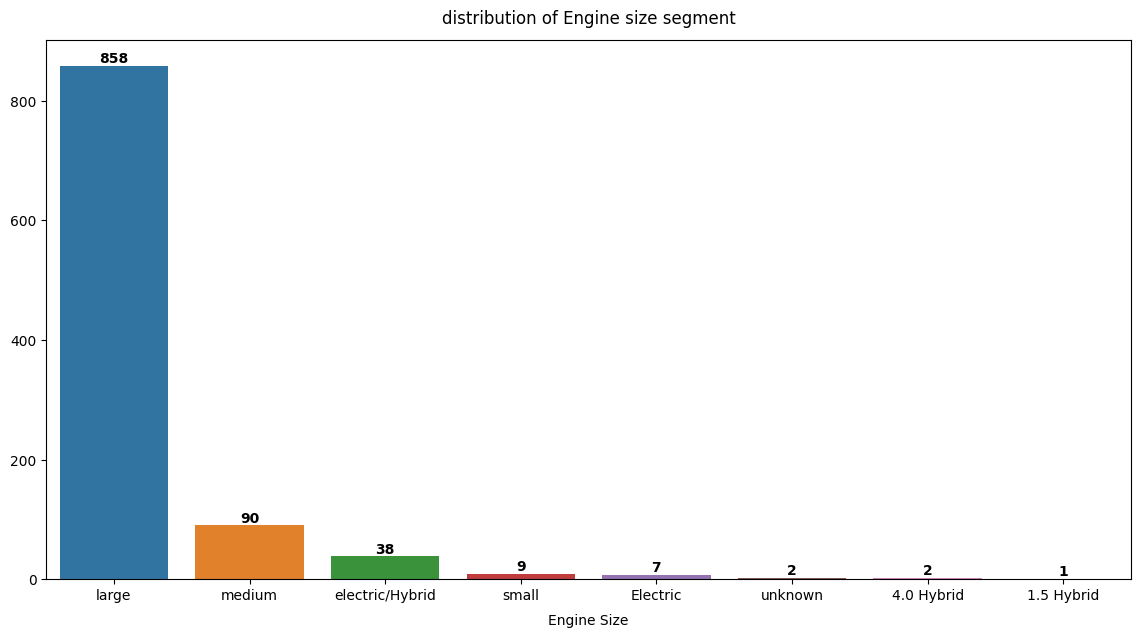

In [86]:
plt.figure(figsize=(14,7))
ax=sns.countplot(data=df,x=df['Engine Size (L)'],order=df['Engine Size (L)'].value_counts().index)
plt.title('distribution of Engine size segment',pad=12)
plt.xlabel('Engine Size',labelpad=8)
plt.ylabel('')
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight='bold')
plt.show()

In [87]:
# find datatypes after changing data types
df.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int32
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int32
dtype: object

summary

In [88]:
df.describe()

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,2021.201589,657.984111,557.347567,3.513406,3.820359e+05
std,2.019802,593.017842,441.906994,0.777639,7.383227e+05
min,1965.000000,181.000000,0.000000,1.800000,2.500000e+04
25%,2021.000000,454.000000,406.000000,2.900000,7.180000e+04
50%,2021.000000,591.000000,509.000000,3.500000,1.400000e+05
75%,2022.000000,708.500000,604.000000,4.000000,2.500000e+05
max,2023.000000,10000.000000,10000.000000,6.500000,5.200000e+06


In [89]:
df.describe(include=object)

,Car Make,Car Model,Engine Size (L)
count,1007,1007,1007
unique,38,176,8
top,Porsche,GT,large
freq,88,55,858


find Duplicate values

In [90]:
df.loc[df.duplicated().sum()]

Car Make                    Chevrolet
Car Model                  Camaro ZL1
Year                             2022
Engine Size (L)                 large
Horsepower                        650
Torque (lb-ft)                    650
0-60 MPH Time (seconds)           3.5
Price (in USD)                  69000
Name: 293, dtype: object

find null values

In [91]:
df.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [92]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,large,379,331,4.0,101200
1,Lamborghini,Huracan,2021,large,630,443,2.8,274390
2,Ferrari,488 GTB,2022,large,661,561,3.0,333750
3,Audi,R8,2022,large,562,406,3.2,142700
4,McLaren,720S,2021,large,710,568,2.7,298000


segment car make

In [93]:
df['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [94]:
#Define a function to segment the values
def segment_car_make(car_make):
    if car_make in ['Porsche', 'Lamborghini', 'Ferrari','McLaren','Aston Martin','Bugatti','Koenigsegg']:
      return 'Luxury'
    elif car_make in ['Audi','Mercedes-Benz','BMW','Chevrolet','Ford', 'Nissan','Dodge', 'Jaguar', 'Mercedes-AMG']:
      return 'Mainstream'
    elif car_make in ['Ariel','W Motors', 'Shelby', 'TVR', 'Subaru','Alpine', 'Ultima']:
      return 'Specialty'
    else:
      return 'Other'


df['Car Make']=df['Car Make'].apply(segment_car_make)
df['Car Make'].unique()

array(['Luxury', 'Mainstream', 'Other', 'Specialty'], dtype=object)

Distribution of cars segment

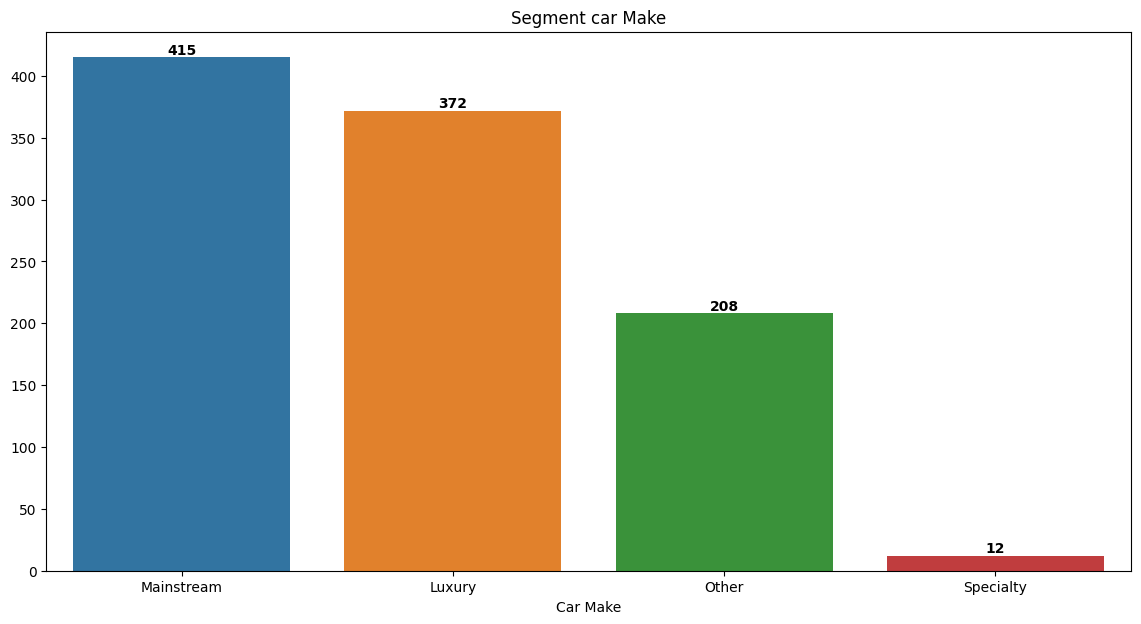

In [95]:
plt.figure(figsize=(14,7))
ax=sns.countplot(data=df,x=df['Car Make'],order=df['Car Make'].value_counts().index)
plt.title('Segment car Make')
plt.xlabel('Car Make')
plt.ylabel('')
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight='bold')
plt.show()

In [96]:
df.head(5)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,911,2022,large,379,331,4.0,101200
1,Luxury,Huracan,2021,large,630,443,2.8,274390
2,Luxury,488 GTB,2022,large,661,561,3.0,333750
3,Mainstream,R8,2022,large,562,406,3.2,142700
4,Luxury,720S,2021,large,710,568,2.7,298000


Distribution of car category in price

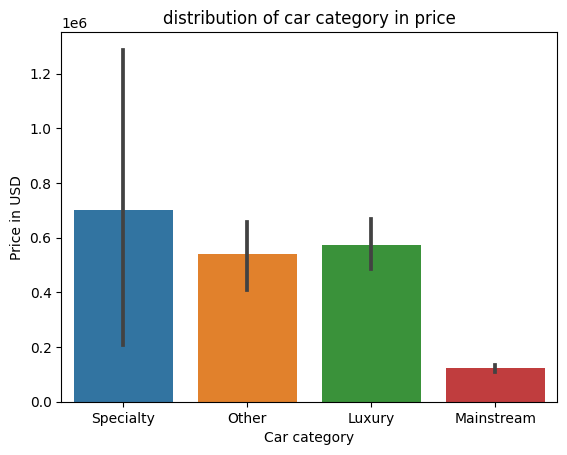

In [97]:
plt.Figure(figsize=(14,7))
sns.barplot(data=df,x= df['Car Make'],y=df['Price (in USD)'],
order=df['Car Make'].value_counts(ascending=True).index)
plt.title('distribution of car category in price')
plt.xlabel('Car category')
plt.ylabel('Price in USD')
plt.show()

Distribution of Engine size in price

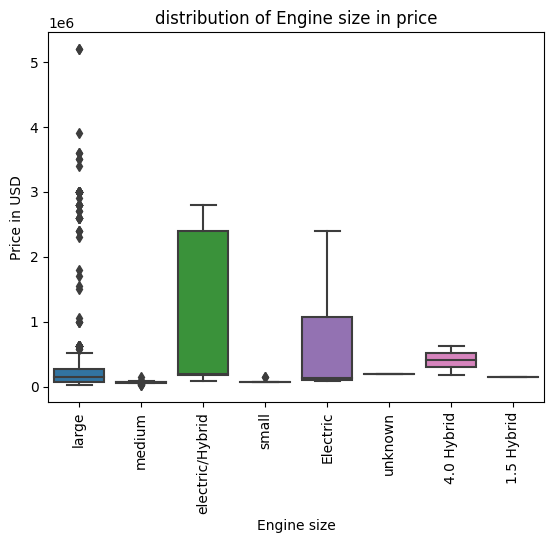

In [98]:
plt.Figure(figsize=(14,7))
sns.boxplot(data=df,x= df['Engine Size (L)'],y=df['Price (in USD)'],
order=df['Engine Size (L)'].value_counts(ascending=False).index)
plt.title('distribution of Engine size in price')
plt.xlabel('Engine size')
plt.ylabel('Price in USD')
plt.xticks(rotation=90)
plt.show()